## Modèles à base d'équations différentielles

In [ ]:
!pip3 install numpy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [ ]:
# The classical prey predator model

def model(C,t):
    prey=C[0]
    predator=C[1]
    dprey = prey*((2/3)-(4/3)*predator)
    dpredator = predator*(1*prey-1)
    return [dprey,dpredator]

t = np.linspace(0,100,100000)
ds = odeint(model,[1,2],t)

X=ds[:,0]
Y=ds[:,1]

%matplotlib inline
plt.figure(1)
plt.plot(t,X,'b-',t,Y,'r')
plt.xlabel('Temps')
plt.ylabel('Abondance')
plt.legend(['proies','prédateurs'])
plt.show()

In [ ]:
# Question 1 : tracer le plan de phase courbe (X(t),Y(t)) et déterminer l'équilibre du système

In [ ]:
# Question 2 : tracer les courbes des espèces du modèle BIOMD0000000006 - Tyson1991 - Cell Cycle 2 var


Exemple tiré de Daun, Silvia et al. “Equation-based models of dynamic biological systems.” Journal of critical care vol. 23,4 (2008): 585-94. doi:10.1016/j.jcrc.2008.02.003



The viral kinetics of influenza A during infection within an individual can be modeled using a simple 3-dimensional ODE System, which incorporates viral growth, target cell limitation and the interferon response:

$$
\frac{dT(t)}{dt}=−βT(t)V(t),
$$
$$
\frac{dI(t)}{dt}=βT(t)V(t)−δI(t),
$$
$$
\frac{dV(t)}{dt}=pI(t)−cV(t),
$$

where T(t) is the number of uninfected target cells, I(t) is the number of infected cells, and V(t) is the infectious viral titer (or total number of free viral particles or concentration of viral particles per unit volume of tissue) at time t. It is assumed in this model that infection is initiated by introduction of virus into the upper respiratory tract at a concentration equivalent to V0 viral particles per unit volume of tissue. Susceptible cells become infected by virus at rate βT(t)V(t), where β is the rate constant quantifying the probability that the interaction between a healthy cell and a viral particle results in infection of the cell. Infected cells, I(t), increase viral titers at an average rate of p per cell and die at a rate of δ per unit time, where 1/δ is the average life span of an infected cell. Free virus is cleared at a rate of c per unit time. The effects of immune responses are not explicitly described in this simple model, but they are implicitly included in the death rate of infected cells (δ) and the clearance rate of virus (c). Such simple systems may still admit complex solutions and several equilibria, depending on the choice of parameters.


*Question* : Modéliser ce système.

*Question* : On suppose que β=0.1 , δ=0.2 , p=0.5 ,c=1 , V0=1. Simuler ce système, puis tracer l'espace des phases pour différentes valeurs de T0 et I0.

A representative pharmacokinetic model is depicted in the following figure where drug is administered in a depot compartment and diffuses following concentration gradients to a central and a peripheral compartment. $A_d(t)$ represents the amount of drug in the depot compartment, $A_c(t)$ the amount of drug in the central compartment and $A_p(t)$ the amount of drug in the peripheral compartment. The rate constant $k_{cp}$ describes the diffusion of the drug from the central compartment into the peripheral compartment and $k_{pc}$ the diffusion from the peripheral into the central compartment, while $k_{el}$ is the elimination constant and $k_a$ is the infusion rate of the drug. 

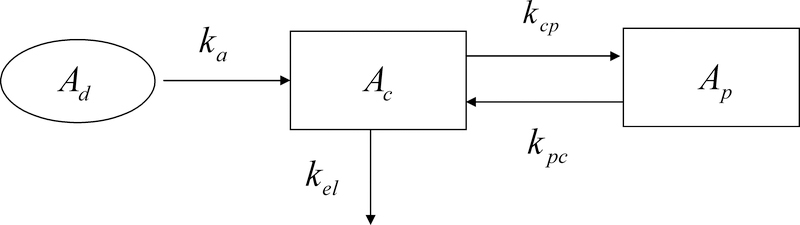

fig. A pharmacokinetic model. Drug is administered in a depot compartment and diffuses following concentration gradients to a central and peripheral compartment.

Question : On suppose que le système suit la loi d'action de masse. Ecrire le système d'ODE et programmer le modèle correspondant.

Question : simuler le système en fixant les différentes constantes.


Exercice : Reprendre et simuler les modèles SIR et SEIR de l'article ["Why is it difficult to accurately predict the COVID-19 epidemic?"](https://www.sciencedirect.com/science/article/pii/S2468042720300075?via%3Dihub)  de Roda et al. 

# Simulation Stochastique

Installer StochPy, une bibliothèque de simulation stochastique

pip install stochpy



In [ ]:
# installation de stochpy
!pip install stochpy

In [ ]:
import stochpy

In [ ]:
model = stochpy.SSA()
model.Model("Burstmodel.psc")
model.DoStochSim()
model.PlotSpeciesTimeSeries()

In [ ]:
# Créons un petit modèle et sauvons le dans Stochpy/pscmodels/test.psc

model = """
# Reactions
R1:
    A > B + byp
    k1*A

R2:
    B > A + byp2
    k2*B

#InitPar
k1 = 0.5
k2 = 0.5

#InitVar
A = 10000
B = 10000
byp = 0
byp2 = 0
"""

fd=open("Stochpy/pscmodels/test.psc","w")
fd.write(model)
fd.close()

# Question : Dessiner ce modèle et le comprendre. Puis le simuler en utilisant StochPy

# Question : Coder tous les modèles la première partie et les simuler.



# Modèles booléens

Reprendre l'exemple de PBN donné en cours et le simuler dans les modes synchrone, puis asynchrone

In [ ]:
# Question : Construire le graphe de transition (utiliser networkx)

# Question : trouver les cycles

Question : Etude de l'article https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4567168/

# Réseaux bayésiens

Afin d'étudier les réseaux bayésiens, nous allons nous baser sur une bibliothèque Python puissante, pgmpy

pip install pgmpy

In [ ]:
!pip install pgmpy
!pip install pandas
!pip install wrapt

L'objectif est de créer un modèle bayésien simple issu de (http://www.bnlearn.com/bnrepository/#cancer) en utilisant pgmpy.

Le principe général consiste à définir la structure du réseau, puis de lui ajouter des paramètres probabilistes.

In [ ]:
# Définition de la structure du réseau
from pgmpy.models import BayesianModel

cancer_model = BayesianModel([('Pollution', 'Cancer'), 
                              ('Smoker', 'Cancer'),
                              ('Cancer', 'Xray'),
                              ('Cancer', 'Dyspnoea')])

In [ ]:
# Définition des paramètres
from pgmpy.factors.discrete import TabularCPD

cpd_poll = TabularCPD(variable='Pollution', variable_card=2,
                      values=[[0.9], [0.1]])
cpd_smoke = TabularCPD(variable='Smoker', variable_card=2,
                       values=[[0.3], [0.7]])
cpd_cancer = TabularCPD(variable='Cancer', variable_card=2,
                        values=[[0.03, 0.05, 0.001, 0.02],
                                [0.97, 0.95, 0.999, 0.98]],
                        evidence=['Smoker', 'Pollution'],
                        evidence_card=[2, 2])
cpd_xray = TabularCPD(variable='Xray', variable_card=2,
                      values=[[0.9, 0.2], [0.1, 0.8]],
                      evidence=['Cancer'], evidence_card=[2])
cpd_dysp = TabularCPD(variable='Dyspnoea', variable_card=2,
                      values=[[0.65, 0.3], [0.35, 0.7]],
                      evidence=['Cancer'], evidence_card=[2])

In [ ]:
# Association des parameters à la structure.
cancer_model.add_cpds(cpd_poll, cpd_smoke, cpd_cancer, cpd_xray, cpd_dysp)

# Test du model.
cancer_model.check_model()


In [ ]:
# Inference des lois de probabilités (algorithme Variable Elimination)
from pgmpy.inference import VariableElimination
infer = VariableElimination(cancer_model)

# Calcul de la probabilité de faire un test RayonX sachant qu'il y a de la pollution
q = infer.query(variables=['Xray'], evidence={'Pollution': 1})
print(q['Xray'])

Question : reprendre le modèle du cours et calculer les probabilités demandées

In [ ]:
!tar czfv ArchiveTP.tgz *